In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [111]:
df = pd.read_csv('data.csv')

In [112]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,148,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,136,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,117,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,114,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,116,307,601,23.0,47.1,2024-05-22T14:38:0


In [113]:
df.shape

(589876, 11)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589876 entries, 0 to 589875
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CO2          589876 non-null  int64  
 1   TVOC         589876 non-null  int64  
 2   PM10         589876 non-null  float64
 3   PM2.5        589876 non-null  float64
 4   CO           589876 non-null  int64  
 5   Air Quality  589876 non-null  int64  
 6   LDR          589876 non-null  int64  
 7   O3           589876 non-null  int64  
 8   Temp         589876 non-null  float64
 9   Hum          589876 non-null  float64
 10  ts           589876 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 49.5+ MB


In [115]:
df.describe()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum
count,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000,589876.000000
mean,596.062072,50.830058,43.469934,18.473955,408.533092,113.971184,895.096527,634.037476,26.356252,45.179883
std,683.037810,465.210328,379.081430,42.088928,119.226035,53.524384,165.804552,66.548247,3.202987,6.695668
min,-32195.000000,-32754.000000,2.500000,0.000000,109.000000,24.000000,8.000000,435.000000,19.300000,24.500000
25%,419.000000,45.000000,5.010000,6.200000,326.000000,66.000000,915.000000,590.000000,24.200000,41.600000
50%,439.000000,50.000000,7.570000,11.500000,407.000000,95.000000,932.000000,632.000000,25.800000,45.100000
75%,481.000000,60.000000,10.130000,20.600000,487.000000,161.000000,945.000000,679.000000,27.900000,48.700000
max,5000.000000,1098.000000,17566.980000,1537.680000,885.000000,373.000000,1000.000000,937.000000,42.800000,85.900000


In [116]:
def categorize_air_quality(value):
    if 0 <= value <= 50:
        return 'Good'
    elif 51 <= value <= 100:
        return 'Moderate'
    elif 101 <= value <= 150:
        return 'Unhealthy for Sensitive'
    elif 151 <= value <= 200:
        return 'Unhealthy'
    elif 201 <= value <= 400:
        return 'Hazardous'
    else:
        return 'Unknown'


In [117]:
df['Air Quality'] = df['Air Quality'].apply(categorize_air_quality)

In [118]:
df.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
0,592,29,10.30,9.0,352,Unhealthy for Sensitive,974,623,24.0,47.2,2024-05-22T14:34:1
1,592,29,10.31,10.1,304,Unhealthy for Sensitive,974,616,23.6,46.8,2024-05-22T14:35:0
2,592,29,4.08,9.9,284,Unhealthy for Sensitive,974,603,23.5,47.8,2024-05-22T14:36:3
3,592,29,7.86,9.6,266,Unhealthy for Sensitive,323,599,23.3,47.1,2024-05-22T14:37:1
4,592,29,6.84,8.4,260,Unhealthy for Sensitive,307,601,23.0,47.1,2024-05-22T14:38:0


In [119]:
df.tail()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
589871,451,59,9.90,30.1,386,Moderate,884,786,29.1,36.1,2025-01-06T22:10:2
589872,419,15,11.18,30.1,385,Moderate,884,786,29.2,36.0,2025-01-06T22:11:2
589873,475,66,6.63,30.5,386,Moderate,885,785,29.3,35.9,2025-01-06T22:12:1
589874,450,64,10.40,29.3,389,Moderate,884,793,29.0,35.8,2025-01-06T22:13:1
589875,439,59,7.37,30.4,389,Moderate,884,795,28.4,36.2,2025-01-06T22:14:0


### Data explaining :
- `CO2`: Carbon dioxide concentration (ppm – parts per million).
- `TVOC`: Total Volatile Organic Compounds (ppb – parts per billion).
- `PM10`: Particulate Matter with a diameter of 10 micrometers or less (µg/m³).
- `PM2.5`: Fine Particulate Matter with a diameter of 2.5 micrometers or less (µg/m³).
- `CO`: Carbon monoxide concentration (likely in ppm or ppb).
- `Air` Quality: Air quality index or score (higher values might indicate worse air quality).
- `LDR`: Light Dependent Resistor reading (indicates light intensity).
- `O3`: Ozone concentration (likely in ppb).
- `Temp`: Temperature (°C).
- `Hum`: Humidity (%).
- `ts`: Timestamp (date and time of data collection).


## Data preprocessing:

### outlier detection

In [120]:
df2=df.copy()

In [121]:
# List of numerical columns (excluding 'ts' since it's a timestamp)
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

In [122]:
# Detect outliers using IQR
Q1 = df2[num_cols].quantile(0.25)
Q3 = df2[num_cols].quantile(0.75)
IQR = Q3 - Q1

In [123]:
IQR

,0
CO2,62.00
TVOC,15.00
PM10,5.12
PM2.5,14.40
CO,161.00
LDR,30.00
O3,89.00
Temp,3.70
Hum,7.10


In [124]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [125]:
# Find outliers (values outside the range)
outliers = ((df2[num_cols] < lower_bound) | (df2[num_cols] > upper_bound))

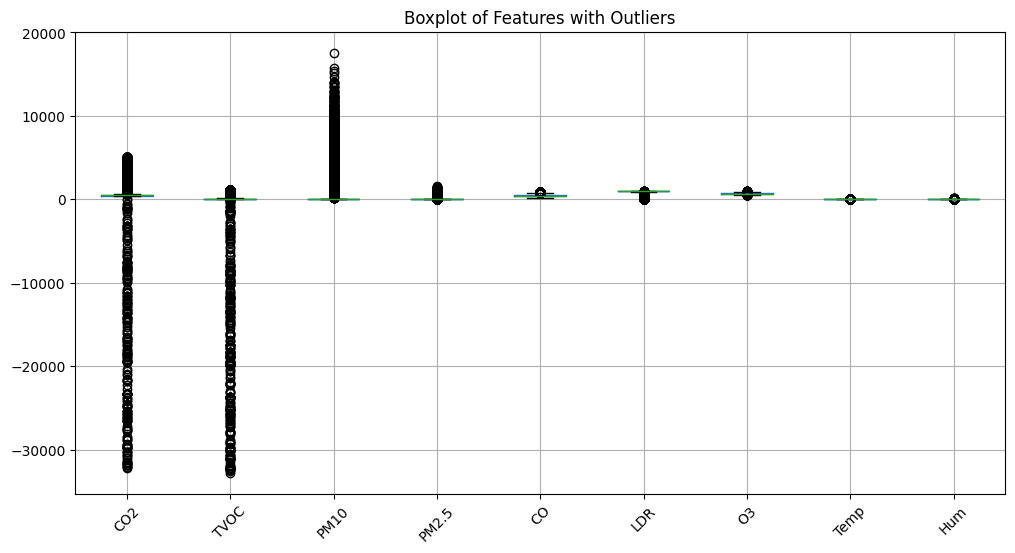

In [126]:
# Draw boxplots
plt.figure(figsize=(12, 6))
df2[num_cols].boxplot(rot=45)
plt.title("Boxplot of Features with Outliers")
plt.show()

In [127]:
# Remove outliers
df2 = df2[~outliers.any(axis=1)]  # Keep only non-outlier rows

In [128]:
df.shape[0] - df2.shape[0]

227788

- 227788 rows detected as outlier, I think they are meannigfull and not anomlies
- Now, we need here Domain Knowledge and Business Logic to know if this portion of data is really outlier or not .

In [107]:
# Compute outlier severity score (distance from nearest bound)
def compute_outlier_score(row):
    score = 0
    for col in num_cols:
        if row[col] < lower_bound[col]:  # Below lower bound
            score += abs(row[col] - lower_bound[col])
        elif row[col] > upper_bound[col]:  # Above upper bound
            score += abs(row[col] - upper_bound[col])
    return score

# Apply the function to compute scores
df["Outlier_Score"] = df.apply(compute_outlier_score, axis=1)

# Extract and sort the worst 10 outliers
worst_outliers = df[df["Outlier_Score"] > 0].sort_values(by="Outlier_Score", ascending=False).head(10)

In [108]:
worst_outliers

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts,Outlier_Score
286244,-30242,-31189,5307.70,649.44,430,Moderate,789,745,23.7,49.4,2024-12-31T21:07:1,67757.63
294147,-31583,-32277,1608.43,133.70,448,Moderate,41,826,23.4,41.4,2025-01-06T09:01:1,66733.12
498425,-31846,-32206,7.08,6.00,462,Moderate,74,726,24.2,73.5,2024-11-04T07:30:0,65210.65
567885,-32195,-32561,5.65,22.90,336,Moderate,890,692,28.0,41.5,2024-12-22T15:09:0,65104.50
566342,-32065,-32447,12.11,20.80,369,Moderate,895,803,26.4,37.0,2024-12-21T13:26:2,64860.50
548924,-32041,-32447,3.86,11.70,436,Moderate,910,740,23.4,51.8,2024-12-09T10:36:5,64836.50
508487,-31828,-32236,3.95,3.30,557,Moderate,931,804,25.0,63.5,2024-11-11T07:25:0,64416.65
500649,-31822,-32185,9.82,6.70,278,Moderate,939,617,24.5,61.9,2024-11-05T20:36:2,64358.05
589085,-31583,-32277,9.53,32.00,448,Moderate,884,826,23.4,41.4,2025-01-06T09:01:1,64222.00
501636,-31553,-32304,7.96,20.60,430,Moderate,938,701,23.2,61.4,2024-11-06T13:03:0,64207.55


- Quetion to be asked to Domain , is these outliers ??!

In [129]:
df2.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
25,564,24,9.63,5.0,282,Unhealthy for Sensitive,963,570,30.8,40.7,2024-05-22T15:37:2
33,553,23,10.91,4.7,264,Unhealthy for Sensitive,941,540,30.8,39.2,2024-05-22T15:50:0
4366,564,24,5.71,30.4,301,Unhealthy for Sensitive,970,503,32.3,34.5,2024-05-26T08:29:2
4367,556,23,11.84,28.2,286,Unhealthy for Sensitive,975,499,31.5,35.1,2024-05-26T08:30:2
4369,552,23,10.82,29.9,267,Unhealthy for Sensitive,977,505,30.8,35.8,2024-05-26T08:33:1


### feature scaling
- we will use noramliztion

In [131]:
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()


In [130]:
# Apply Min-Max Scaling (0 to 1)
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()

min_max_scaler = MinMaxScaler()
df3 = df2.copy()
df3[num_cols] = min_max_scaler.fit_transform(df2[num_cols])

In [133]:
df3.head()

,CO2,TVOC,PM10,PM2.5,CO,Air Quality,LDR,O3,Temp,Hum,ts
25,0.954955,0.016949,0.713,0.107914,0.275974,Unhealthy for Sensitive,0.808696,0.304598,0.814286,0.342756,2024-05-22T15:37:2
33,0.905405,0.000000,0.841,0.100719,0.246753,Unhealthy for Sensitive,0.617391,0.218391,0.814286,0.289753,2024-05-22T15:50:0
4366,0.954955,0.016949,0.321,0.717026,0.306818,Unhealthy for Sensitive,0.869565,0.112069,0.921429,0.123675,2024-05-26T08:29:2
4367,0.918919,0.000000,0.934,0.664269,0.282468,Unhealthy for Sensitive,0.913043,0.100575,0.864286,0.144876,2024-05-26T08:30:2
4369,0.900901,0.000000,0.832,0.705036,0.251623,Unhealthy for Sensitive,0.930435,0.117816,0.814286,0.169611,2024-05-26T08:33:1


In [135]:
df3.describe()

,CO2,TVOC,PM10,PM2.5,CO,LDR,O3,Temp,Hum
count,362088.000000,362088.000000,362088.000000,362088.000000,362088.000000,362088.000000,362088.000000,362088.000000,362088.000000
mean,0.374336,0.493999,0.497773,0.294594,0.492031,0.536879,0.506603,0.461091,0.509845
std,0.128412,0.161415,0.290037,0.223498,0.171616,0.171174,0.160626,0.170604,0.176865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283784,0.389831,0.246000,0.119904,0.373377,0.434783,0.387931,0.328571,0.399293
50%,0.355856,0.457627,0.498000,0.242206,0.485390,0.547826,0.491379,0.450000,0.512367
75%,0.418919,0.576271,0.748000,0.422062,0.602273,0.660870,0.617816,0.578571,0.621908
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data splitting

In [138]:
df3['Air Quality'].value_counts()

,count
Air Quality,
Moderate,177297
Unhealthy,109630
Unhealthy for Sensitive,46976
Good,16123
Hazardous,12062


In [143]:
df['Air Quality'].value_counts()

,count
Air Quality,
Moderate,255994
Unhealthy,174047
Unhealthy for Sensitive,89972
Good,43768
Hazardous,26095


- Before we apply SMOTE, we need to train_test split to prevernt data leakage



In [144]:
#Before we apply SMOTE, we need to train_test split to prevernt data leakage
X = df3.drop(columns=['Air Quality'])
y = df3['Air Quality']


In [147]:
# Apply One-Hot Encoding to features (if needed)
encoder = OneHotEncoder(handle_unknown="ignore")
X_encoded = encoder.fit_transform(X)

In [148]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)


In [149]:
y_train

,Air Quality
570808,Moderate
444087,Moderate
557828,Moderate
380522,Moderate
541804,Moderate
...,...
229981,Unhealthy for Sensitive
579749,Moderate
524248,Moderate
106430,Unhealthy


### SMOTE - (Synthetic Minority Over-sampling Technique)

In [150]:
# Apply SMOTE on the training data
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [151]:
X_train.shape, y_train.shape

((289670, 341354), (289670,))

In [152]:
X_train_smote.shape, y_train_smote.shape

((709185, 341354), (709185,))

In [155]:
y_train.value_counts()

,count
Air Quality,
Moderate,141837
Unhealthy,87704
Unhealthy for Sensitive,37581
Good,12898
Hazardous,9650


In [154]:
y_train_smote.value_counts()

,count
Air Quality,
Moderate,141837
Unhealthy for Sensitive,141837
Unhealthy,141837
Good,141837
Hazardous,141837


- Now, my data is balanced.